# IMDb Movies Data Analysis Portfolio Project

### Data Source: [Movie Industry](https://www.kaggle.com/datasets/danielgrijalvas/movies)
### This data was scraped from IMDb and contains 7668 movies in the dataset (200 movies per year, 1980-2020).

> We will **analyze** and **explore** the data after **cleaning** and **preprocessing** it using `Pandas` and `Numpy` and `Matplotlib` and `Seaborn` for these processess.

In [2]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. *Read and quick look at the data*

In [4]:
# Read the data
df = pd.read_csv('movies.csv')

In [5]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
df.shape

(7668, 15)

In [7]:
# Looking at columns and it types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
# number of unique values in single column
df.nunique()

name        7512
rating        12
genre         19
year          41
released    3414
score         72
votes        936
director    2949
writer      4535
star        2814
country       59
budget       413
gross       7472
company     2385
runtime      138
dtype: int64

## *2. Data Cleaning and Preprocessing*
* **Remove duplicates**
* **Standarize the data**
* **Handle missing values**
* **Remove some columns and rows**
* **Split single columns into multi columns**

In [10]:
df.drop_duplicates()

# We don't have any duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [11]:
# Split release country from released column using regular expression
df['release_country'] = df['released'].astype('str').str.replace(r'\w+\s\d{1,2},\s\d{4}', '', regex=True)
df['release_country'] = df['release_country'].str.replace(r'[()]', '', regex=True)
df['release_country']

0        United States
1        United States
2        United States
3        United States
4        United States
             ...      
7663     United States
7664     United States
7665          Cameroon
7666     United States
7667     United States
Name: release_country, Length: 7668, dtype: object

### *Look at the different between year and released year columns*

> It's look some movies have different years and ***year column*** is the right when you search on Google, So we will look at some rows to confirm.

In [13]:
df.filter(items= ['year', 'released'], axis=1).head(15)

,year,released
0,1980,"June 13, 1980 (United States)"
1,1980,"July 2, 1980 (United States)"
2,1980,"June 20, 1980 (United States)"
3,1980,"July 2, 1980 (United States)"
4,1980,"July 25, 1980 (United States)"
5,1980,"May 9, 1980 (United States)"
6,1980,"June 20, 1980 (United States)"
7,1980,"December 19, 1980 (United States)"
8,1980,"June 19, 1981 (United States)"
9,1980,"May 16, 1980 (United States)"


In [14]:
# looking at 8, 11,....,96, 95,... rows, it has different years, so we will drop released column
print(df.loc[96], '\n\n', df.loc[11])

name                                The Evil Dead
rating                                      NC-17
genre                                      Horror
year                                         1981
released           April 15, 1983 (United States)
score                                         7.5
votes                                    192000.0
director                                Sam Raimi
writer                                  Sam Raimi
star                               Bruce Campbell
country                             United States
budget                                   350000.0
gross                                   2956630.0
company                      Renaissance Pictures
runtime                                      85.0
release_country                     United States
Name: 96, dtype: object 

 name                         The Gods Must Be Crazy
rating                                           PG
genre                                     Adventure
year             

In [15]:
# drop released column
df = df.drop(columns='released')
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,United States
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,United States
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Cameroon
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,United States


In [16]:
# Handle missing values
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    missing = np.mean(df[col].isnull())
    print(f'{col} - {round(missing*100)}%')

name - 0%
rating - 1%
genre - 0%
year - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%
release_country - 0%


In [17]:
# Remove missing values
df = df.dropna()
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,United States
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,United States
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,United States
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,United States


### *Convert some columns types for statistical analysis*

In [19]:
df.dtypes

name                object
rating              object
genre               object
year                 int64
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
release_country     object
dtype: object

In [20]:
# Change some columns type
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

C:\Users\mo\AppData\Local\Temp\ipykernel_2000\4123297125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['votes'] = df['votes'].astype('int64')
C:\Users\mo\AppData\Local\Temp\ipykernel_2000\4123297125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget'] = df['budget'].astype('int64')
C:\Users\mo\AppData\Local\Temp\ipykernel_2000\4123297125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [21]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,United States
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,United States
7650,Dolittle,PG,Adventure,2020,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101,United States
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100,United States


In [22]:
# Create new csv file and put clean data in.
df.to_csv('IMDb_movies.csv', index=False)

## 3. *Exploratory Data Analysis*
* **Descriptive Analysis**
* **Relational Analysis using `group by` and `sort values`**
* **Correlation**
* **Visualization**
* **Dashboard**

In [24]:
plt.style.use('ggplot')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12,8)

In [25]:
print(f'We have {df.shape[0]} movies from {df['company'].nunique()} companies in {df['country'].nunique()} countries over {df['year'].nunique()} years')

We have 5421 movies from 1475 companies in 50 countries over 41 years


C:\Users\mo\AppData\Local\Temp\ipykernel_2000\1710764563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='name', data=top_movies, palette='viridis')


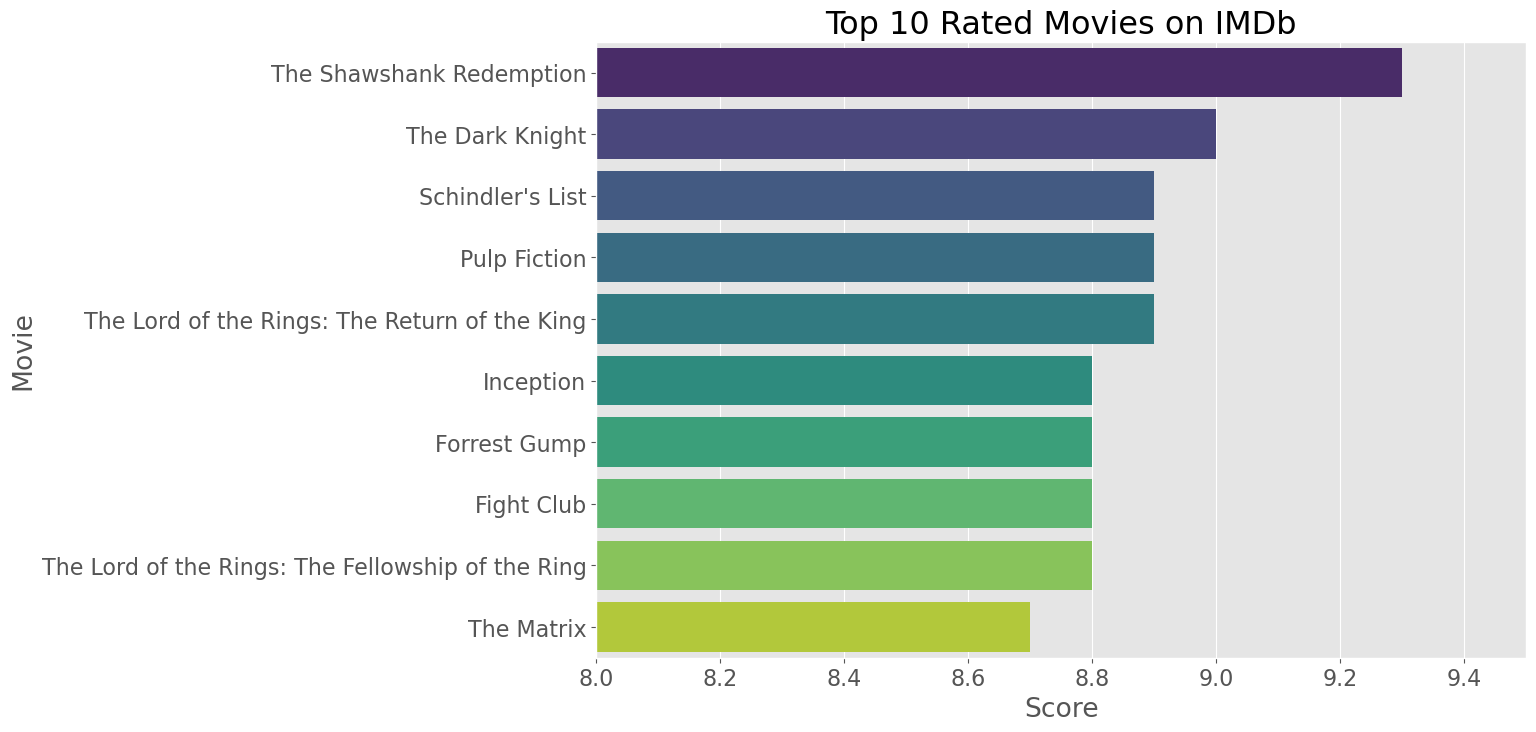

In [26]:
top_movies = df.sort_values(by=['score'], ascending=False).head(10)

sns.barplot(x='score', y='name', data=top_movies, palette='viridis')

plt.title('Top 10 Rated Movies on IMDb')
plt.xlabel('Score')
plt.ylabel('Movie')

plt.xlim(8., 9.5)

plt.show()

In [27]:
# Top 10 highest budget movies
df.sort_values(by=['budget'], ascending=False).head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,United States
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152,United States
7066,Justice League,PG-13,Action,2017,6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120,United States
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169,United States
7463,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,2019,6.5,394000,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000,1078232589,Walt Disney Pictures,141,United States
7261,Solo: A Star Wars Story,PG-13,Action,2018,6.9,306000,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000,392924807,Lucasfilm,135,United States
4870,Superman Returns,PG-13,Action,2006,6.0,274000,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000,391081192,Warner Bros.,154,United States
7480,The Lion King,PG,Animation,2019,6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,United States
5658,Tangled,PG,Animation,2010,7.7,417000,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000,592462816,Walt Disney Animation Studios,100,United States


C:\Users\mo\AppData\Local\Temp\ipykernel_2000\2375655236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gross', y='name', data=top_movies_gross, palette='plasma')


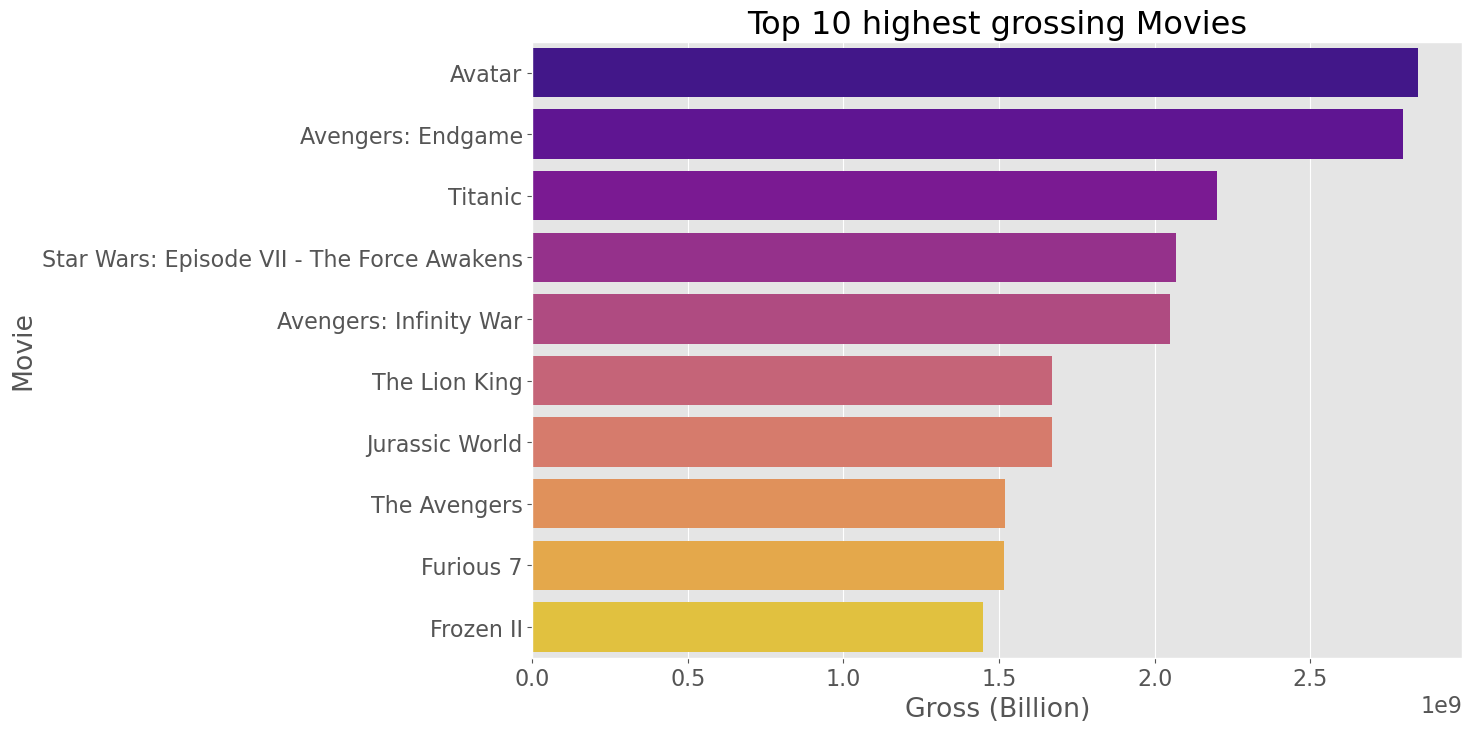

In [28]:
top_movies_gross = df.sort_values(by=['gross'], ascending=False).head(10)

sns.barplot(x='gross', y='name', data=top_movies_gross, palette='plasma')

plt.title('Top 10 highest grossing Movies')
plt.xlabel('Gross (Billion)')
plt.ylabel('Movie')

plt.show()

In [29]:
# Top 10 long movies
df.sort_values(by=['runtime'], ascending=False).head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
2280,Gettysburg,PG,Drama,1993,7.6,27000,Ron Maxwell,Michael Shaara,Tom Berenger,United States,25000000,10769960,TriStar Television,271,United States
2888,Hamlet,PG-13,Drama,1996,7.7,37000,Kenneth Branagh,William Shakespeare,Kenneth Branagh,United Kingdom,18000000,4770222,Castle Rock Entertainment,242,United States
479,Once Upon a Time in America,R,Crime,1984,8.4,321000,Sergio Leone,Harry Grey,Robert De Niro,Italy,30000000,5473212,The Ladd Company,229,United States
21,Heaven's Gate,R,Adventure,1980,6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219,United States
4343,Gods and Generals,PG-13,Biography,2003,6.3,16000,Ron Maxwell,Jeff Shaara,Stephen Lang,United States,56000000,12923936,Turner Pictures (I),219,United States
3989,Kabhi Khushi Kabhie Gham...,Not Rated,Drama,2001,7.4,46000,Karan Johar,Karan Johar,Shah Rukh Khan,India,7500000,11334547,Dharma Productions,210,United States
7465,The Irishman,R,Biography,2019,7.8,344000,Martin Scorsese,Steven Zaillian,Robert De Niro,United States,159000000,968853,Tribeca Productions,209,United States
2082,Malcolm X,PG-13,Biography,1992,7.7,89000,Spike Lee,Alex Haley,Denzel Washington,Japan,33000000,48169910,Largo International N.V.,202,United States
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,8.9,1700000,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000,1146030912,New Line Cinema,201,United States
2247,Schindler's List,R,Biography,1993,8.9,1200000,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000,322161245,Universal Pictures,195,United States


In [30]:
# Top 10 short movies
df.sort_values(by=['runtime'], ascending=True).head(10)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
5985,Winnie the Pooh,G,Animation,2011,7.2,23000,Stephen J. Anderson,Stephen J. Anderson,Jim Cummings,United States,30000000,49871429,Walt Disney Pictures,63,United States
3318,Following,R,Crime,1998,7.5,89000,Christopher Nolan,Christopher Nolan,Jeremy Theobald,United Kingdom,6000,48482,Next Wave Films,69,United Kingdom
1271,The Land Before Time,G,Animation,1988,7.4,82000,Don Bluth,Stu Krieger,Pat Hingle,United States,12500000,84460846,Lucasfilm,69,United States
2381,Once Upon a Forest,G,Animation,1993,6.5,5200,Charles Grosvenor,Rae Lambert,Michael Crawford,United Kingdom,13000000,6582052,Hanna-Barbera Productions,71,United States
4407,The Jungle Book 2,G,Animation,2003,5.4,15000,Steve Trenbirth,Karl Geurs,John Goodman,United States,20000000,186303759,Disney Television Animation,72,United States
4207,Peter Pan 2: Return to Never Land,G,Animation,2002,5.8,19000,Robin Budd,Temple Mathews,Blayne Weaver,United States,20000000,115121981,Disney Television Animation,72,United States
3580,The Adventures of Elmo in Grouchland,G,Adventure,1999,5.8,3100,Gary Halvorson,Mitchell Kriegman,Kevin Clash,United States,26000000,11683047,Jim Henson Pictures,73,United States
4640,Clifford's Really Big Movie,G,Animation,2004,5.4,822,Robert C. Ramirez,Rhett Reese,John Ritter,United States,70000,3255426,Big Red Dog Productions,74,United States
1282,Oliver & Company,G,Animation,1988,6.7,45000,George Scribner,Jim Cox,Joey Lawrence,United States,31000000,74151346,Walt Disney Animation Studios,74,United States
902,The Great Mouse Detective,G,Animation,1986,7.2,46000,Directors,Peter Young,Vincent Price,United States,14000000,38625550,Walt Disney Pictures,74,United States


In [31]:
# Rating vs name
df['rating'].value_counts()

rating
R            2597
PG-13        1729
PG            907
G             111
Not Rated      44
Unrated        17
NC-17          12
TV-MA           2
Approved        1
X               1
Name: count, dtype: int64

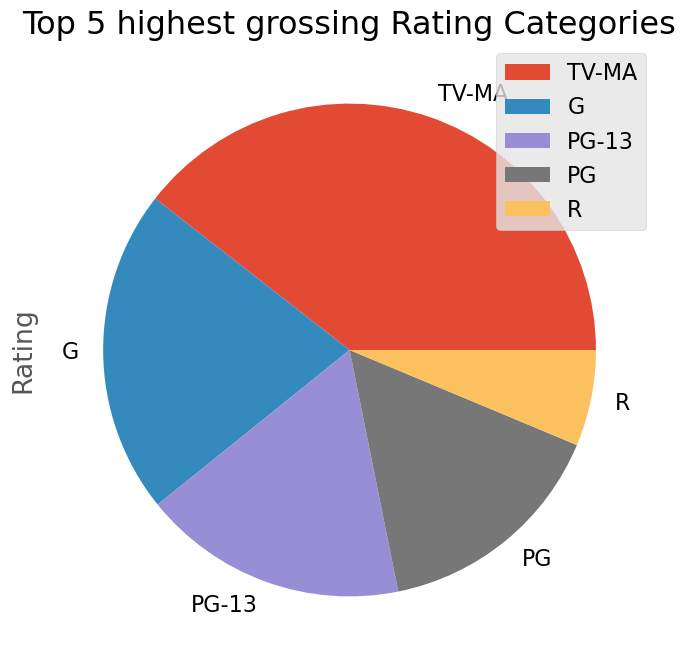

In [32]:
top_rating = df.groupby('rating')['gross'].mean().sort_values(ascending=False).head(5)

top_rating.plot(kind='pie')

plt.title('Top 5 highest grossing Rating Categories')
plt.ylabel('Rating')
plt.legend(labels= top_rating.index)

plt.show()

In [33]:
# Genre vs name
df['genre'].value_counts().head(10)

genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Name: count, dtype: int64

In [34]:
# Most highest budget movie genres to produce
df.groupby('genre')['budget'].mean().sort_values(ascending=False)

genre
Animation    7.632336e+07
Action       5.846856e+07
Family       5.112500e+07
Adventure    4.595890e+07
Mystery      3.187647e+07
Biography    2.544167e+07
Sci-Fi       2.441667e+07
Romance      2.404000e+07
Drama        2.324188e+07
Comedy       2.280237e+07
Crime        2.260290e+07
Fantasy      1.722439e+07
Horror       1.343453e+07
Thriller     1.274286e+07
Western      1.050000e+07
Name: budget, dtype: float64

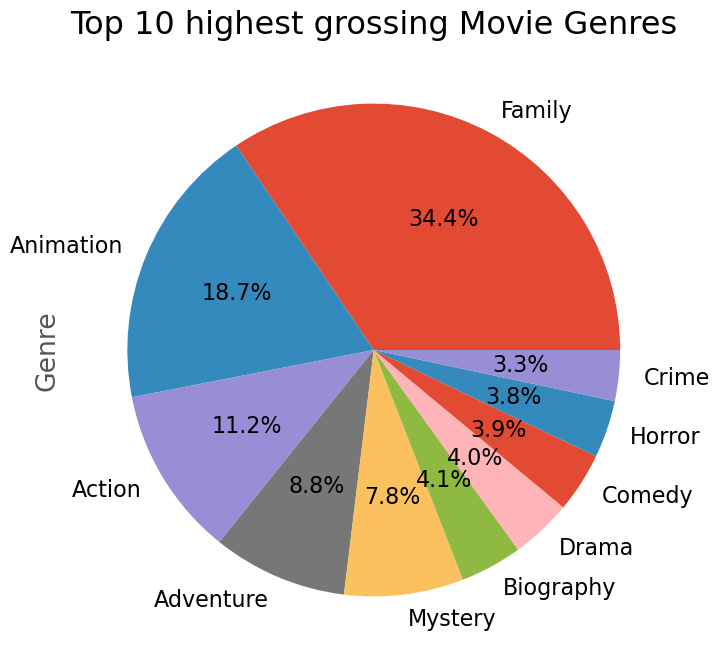

In [35]:
top_genre = df.groupby('genre')['gross'].mean().sort_values(ascending=False).head(10)

top_genre.plot(kind='pie', autopct='%1.1f%%')

plt.title('Top 10 highest grossing Movie Genres')
plt.ylabel('Genre')

plt.show()

In [36]:
# Top 10 dous between directors and stars in terms of highest grossing
df.groupby(['name', 'director', 'star'])['gross'].max().sort_values(ascending=False).head(10)

name                                        director         star             
Avatar                                      James Cameron    Sam Worthington      2847246203
Avengers: Endgame                           Anthony Russo    Robert Downey Jr.    2797501328
Titanic                                     James Cameron    Leonardo DiCaprio    2201647264
Star Wars: Episode VII - The Force Awakens  J.J. Abrams      Daisy Ridley         2069521700
Avengers: Infinity War                      Anthony Russo    Robert Downey Jr.    2048359754
The Lion King                               Jon Favreau      Donald Glover        1670727580
Jurassic World                              Colin Trevorrow  Chris Pratt          1670516444
The Avengers                                Joss Whedon      Robert Downey Jr.    1518815515
Furious 7                                   James Wan        Vin Diesel           1515341399
Frozen II                                   Chris Buck       Kristen Bell         14

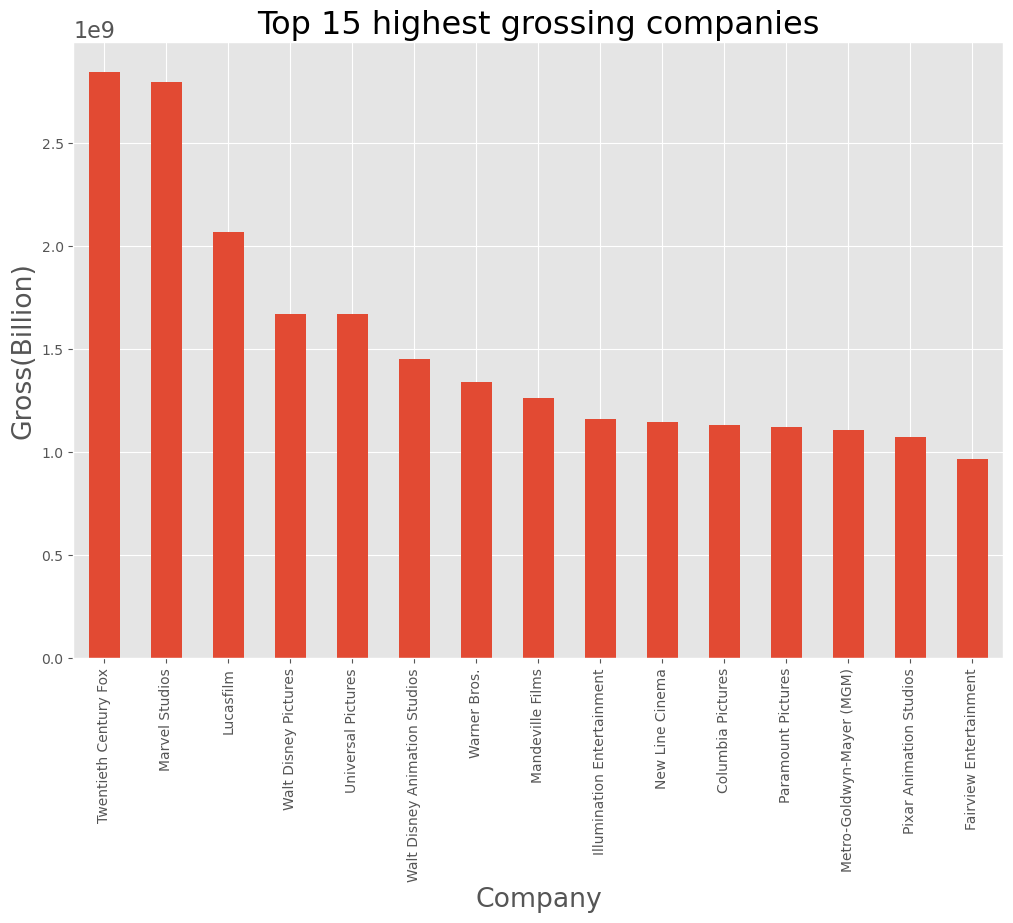

In [37]:
top_company = df.groupby(['company'])['gross'].max().sort_values(ascending=False).head(15)

top_company.plot(kind='bar', fontsize=10)

plt.title('Top 15 highest grossing companies')
plt.xlabel('Company')
plt.ylabel('Gross(Billion)')

plt.show()

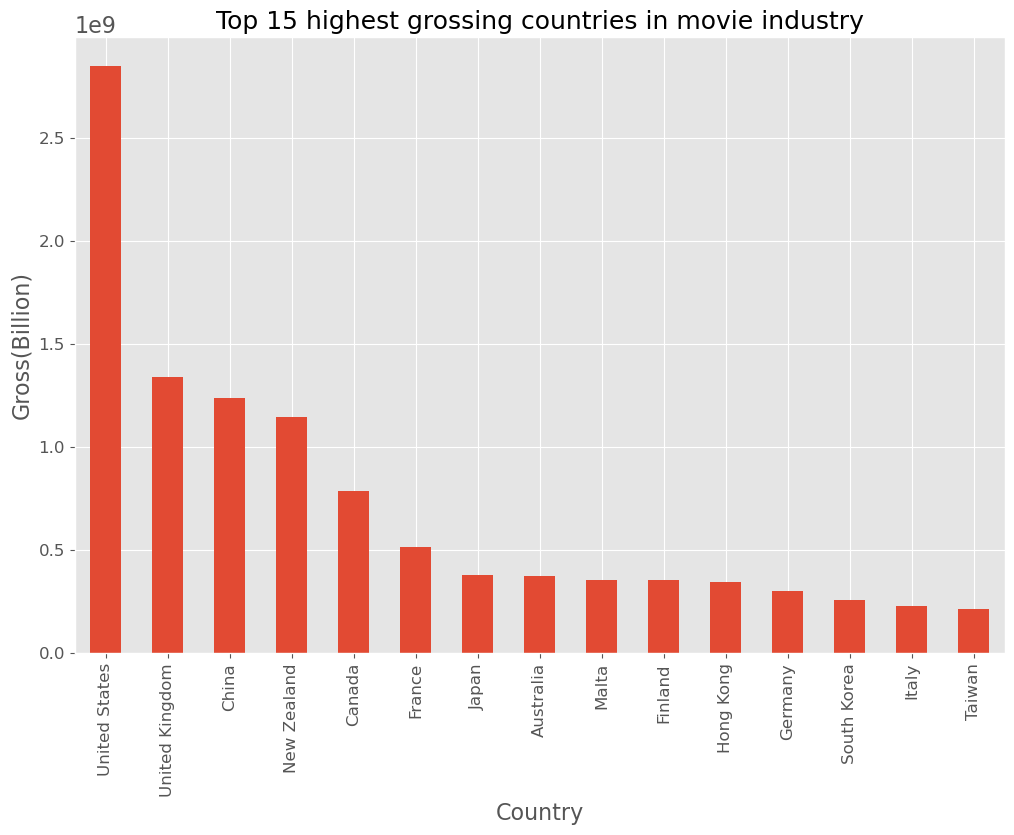

In [38]:
top_country = df.groupby(['country'])['gross'].max().sort_values(ascending=False).head(15)
top_country.plot(kind='bar', fontsize=12)

plt.title('Top 15 highest grossing countries in movie industry', fontsize=18)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Gross(Billion)', fontsize=16)

plt.show()

### *Correlation matrix for Movies*

> We will focus on *Correlation* between **gross** and other columns to know what effects the increase or decrease of movie gross?

In [40]:
# Convert some cloumns to categorical columns
df_numerized = df.copy()

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country
0,4692,6,6,1980,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146,47
1,3929,6,1,1980,5.8,65000,1578,1158,214,47,4500000,58853106,452,104,47
2,3641,4,0,1980,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124,47
3,204,4,4,1980,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88,47
4,732,6,4,1980,7.3,108000,719,351,271,47,6000000,39846344,1083,98,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,6.6,140000,16,2390,1812,47,90000000,426505244,452,124,47
7649,3556,4,0,2020,6.5,102000,852,2309,147,47,85000000,319715683,1108,99,47
7650,1153,4,1,2020,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101,47
7651,3978,4,1,2020,6.8,42000,294,2091,640,6,135000000,111105497,12,100,47


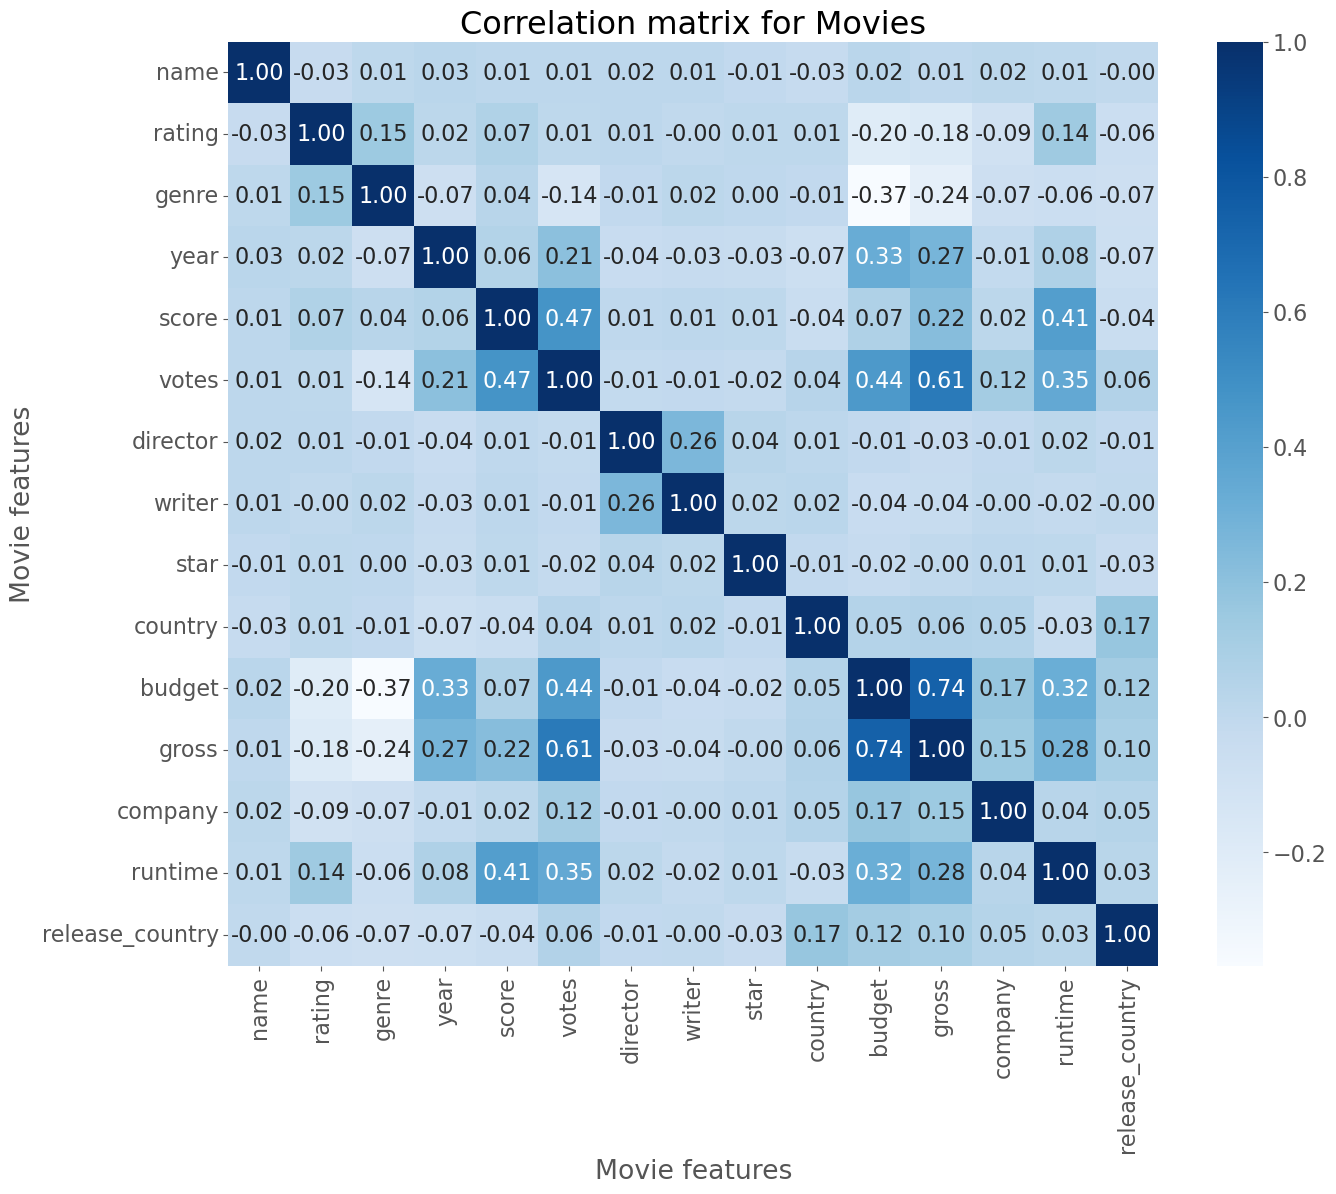

In [41]:
correlation_matrix = df_numerized.corr()

plt.figure(figsize=(15,12))

sns.heatmap(correlation_matrix, fmt='.2f', annot=True, cmap='Blues')

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

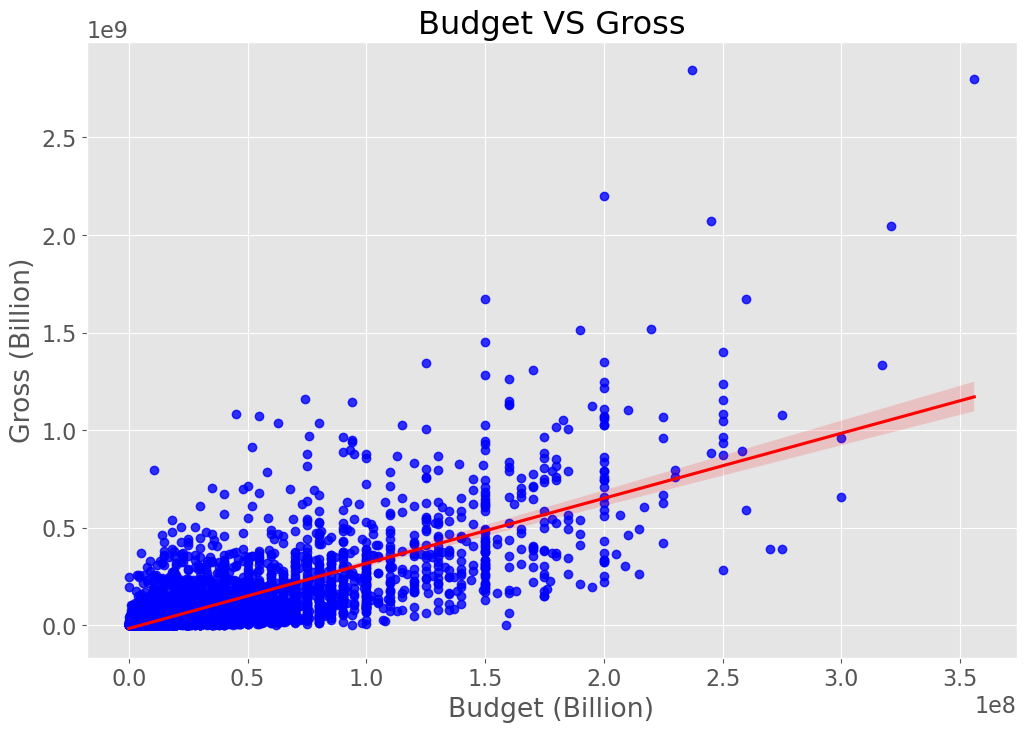

In [42]:
sns.regplot(x="budget", y="gross", data=df_numerized, scatter_kws={'color':'blue'}, line_kws={'color':'red'},)

plt.title("Budget VS Gross")

plt.xlabel("Budget (Billion)")

plt.ylabel("Gross (Billion)")

plt.show()

## *Dashboard*

C:\Users\mo\AppData\Local\Temp\ipykernel_2000\1616196216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='name', data=top_movies, palette='viridis', ax=axes[0,0])
C:\Users\mo\AppData\Local\Temp\ipykernel_2000\1616196216.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gross', y='name', data=top_movies_gross, palette='plasma', ax=axes[1,0])


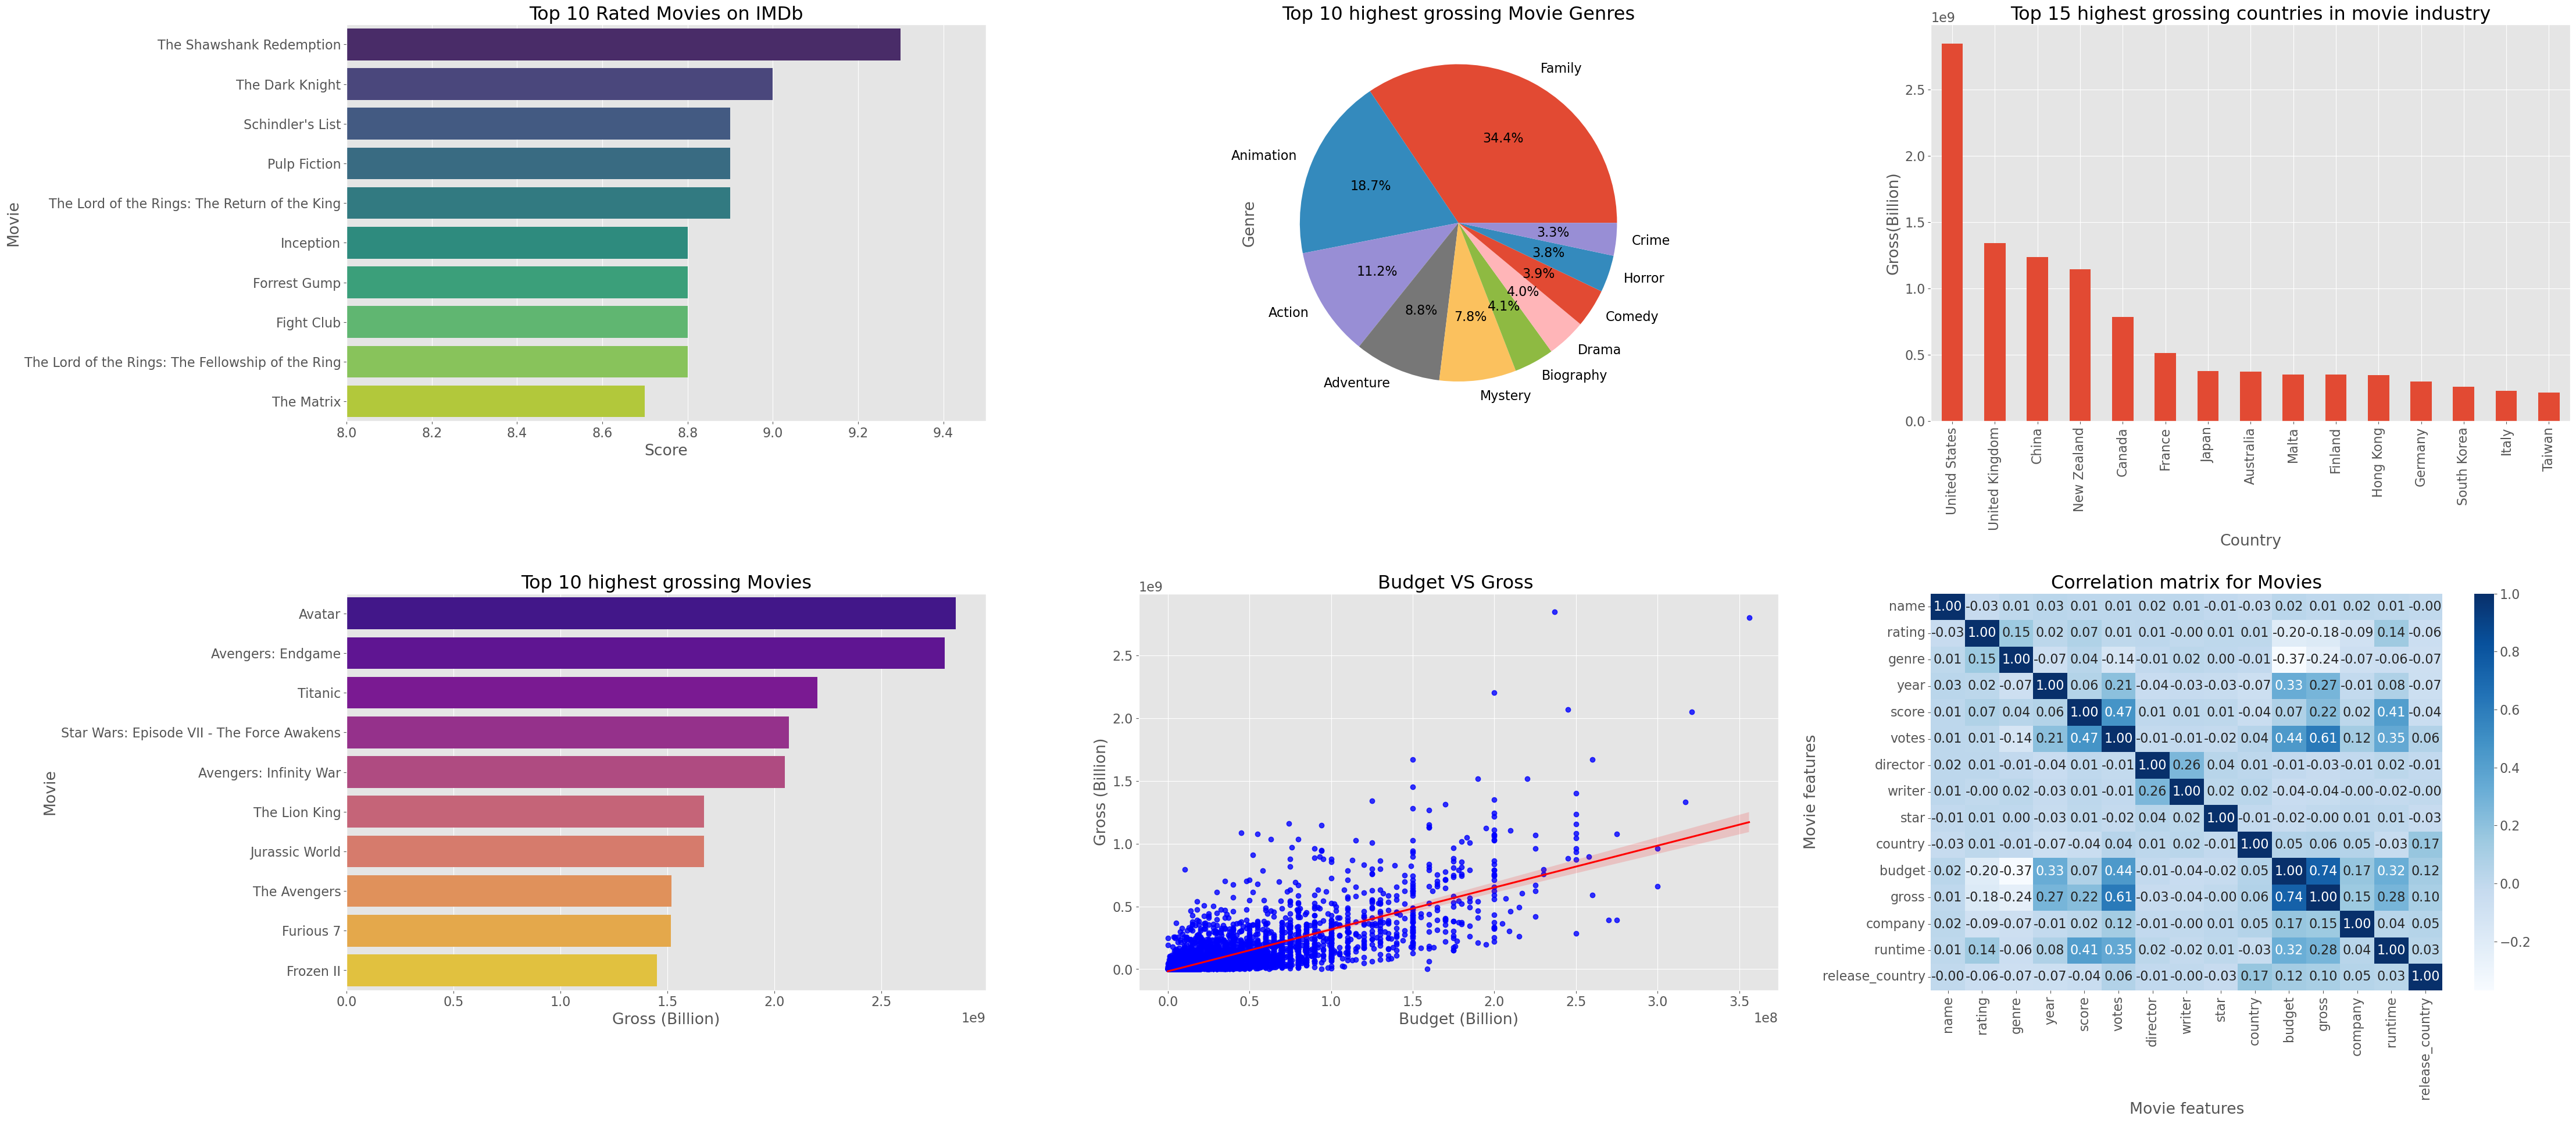

In [44]:
feg, axes = plt.subplots(2,3, figsize= (45,20))

sns.barplot(x='score', y='name', data=top_movies, palette='viridis', ax=axes[0,0])
axes[0,0].set_title('Top 10 Rated Movies on IMDb')
axes[0,0].set_xlabel('Score')
axes[0,0].set_ylabel('Movie')
axes[0,0].set_xlim(8., 9.5)

top_genre.plot(kind='pie', autopct='%1.1f%%', ax=axes[0,1])
axes[0,1].set_title('Top 10 highest grossing Movie Genres')
axes[0,1].set_ylabel('Genre')

top_country.plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Top 15 highest grossing countries in movie industry')
axes[0,2].set_xlabel('Country')
axes[0,2].set_ylabel('Gross(Billion)')

sns.barplot(x='gross', y='name', data=top_movies_gross, palette='plasma', ax=axes[1,0])
axes[1,0].set_title('Top 10 highest grossing Movies')
axes[1,0].set_xlabel('Gross (Billion)')
axes[1,0].set_ylabel('Movie')

sns.regplot(x="budget", y="gross", data=df_numerized, scatter_kws={'color':'blue'}, line_kws={'color':'red'}, ax=axes[1,1])
axes[1,1].set_title("Budget VS Gross ")
axes[1,1].set_xlabel("Budget (Billion)")
axes[1,1].set_ylabel("Gross (Billion)")

sns.heatmap(correlation_matrix, fmt='.2f', annot=True, cmap='Blues', ax=axes[1,2])
axes[1,2].set_title("Correlation matrix for Movies")
axes[1,2].set_xlabel("Movie features")
axes[1,2].set_ylabel("Movie features")

plt.tight_layout(pad=2)